In [61]:
import pandas as pd
dataset = pd.read_csv("dataset2.csv")

In [62]:
dataset.head()

,Unnamed: 0,Unnamed: 0.1,No.,Compound ID,SMILES,Assay ID,LogP app
0,0,0,1.0,CHEMBL121893,[N@H+]2(CCCCC2)CCC(=O)c1ccc(OCCCCCC)cc1,CHEMBL1034536,-2.67
1,1,1,2.0,CHEMBL538150,C(=O)(c1cc2c(cc(OCCCCCC)cc2)cc1)CC[N@H+](C)C,CHEMBL1034536,-2.85
2,2,2,3.0,CHEMBL539139,C(=O)(c1ccc(OCCOCC)cc1)CC[N@@H+](C)C,CHEMBL1034536,-3.80
3,3,3,4.0,CHEMBL539393,C(=O)(c1cc(C)c(OCCCCCC)cc1)CC[N@H+](C)C,CHEMBL1034536,-2.91
4,4,4,5.0,CHEMBL539718,C(=O)(c1c(Cl)cc(SCCCCCC)cc1)CC[N@@H+](C)C,CHEMBL1034536,-3.22


# molオブジェクトに変換する

In [63]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, PandasTools, Descriptors
# from rdkit.Chem.Draw import IPythonConsole

In [84]:
from rdkit import Chem

# PandasTools.AddMoleculeColumnToFrame(df,'SMILES')
mols = [Chem.MolFromSmiles(smiles) for smiles in dataset['SMILES']]
# mols = []
# for smiles in df['SMILES']:
#     mols.append(Chem.MolFromSmiles(smiles))
    
mol_seri = pd.Series(mols, name='ROMol')
df_mols = pd.concat([dataset, mol_seri], axis=1)
df_nonna = df_mols.dropna().reset_index()

RDKit ERROR: [12:37:07] Can't kekulize mol.  Unkekulized atoms: 50 51 52 53 54 55 56 57 58
RDKit ERROR: 
RDKit ERROR: [12:37:07] Can't kekulize mol.  Unkekulized atoms: 40 41 42 43 44 45 46 47 48
RDKit ERROR: 
RDKit ERROR: [12:37:07] Can't kekulize mol.  Unkekulized atoms: 43 44 45 46 47 48 49 50 51
RDKit ERROR: 
RDKit ERROR: [12:37:07] Can't kekulize mol.  Unkekulized atoms: 40 41 42 43 44 45 46 47 48
RDKit ERROR: 
RDKit ERROR: [12:37:07] Can't kekulize mol.  Unkekulized atoms: 40 41 42 43 44 45 46 47 48
RDKit ERROR: 
RDKit ERROR: [12:37:07] Can't kekulize mol.  Unkekulized atoms: 40 41 42 43 44 45 46 47 48
RDKit ERROR: 
RDKit ERROR: [12:37:07] Can't kekulize mol.  Unkekulized atoms: 40 41 42 43 44 45 46 47 48
RDKit ERROR: 
RDKit ERROR: [12:37:07] Can't kekulize mol.  Unkekulized atoms: 41 42 43 44 45 46 47 48 49
RDKit ERROR: 
RDKit ERROR: [12:37:07] Can't kekulize mol.  Unkekulized atoms: 32 33 34 35 36 37 38 39 40
RDKit ERROR: 
RDKit ERROR: [12:37:07] Can't kekulize mol.  Unkekulize

RDKit ERROR: 
RDKit ERROR: [12:37:08] Can't kekulize mol.  Unkekulized atoms: 0 28 32 33 34
RDKit ERROR: 
RDKit ERROR: [12:37:08] Can't kekulize mol.  Unkekulized atoms: 33 34 35 36 37 38 39 40 41
RDKit ERROR: 
RDKit ERROR: [12:37:08] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [12:37:08] Can't kekulize mol.  Unkekulized atoms: 0 27 28 30 31
RDKit ERROR: 
RDKit ERROR: [12:37:08] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
RDKit ERROR: 
RDKit ERROR: [12:37:08] Can't kekulize mol.  Unkekulized atoms: 109 110 111 112 113 114 115 116 117
RDKit ERROR: 
RDKit ERROR: [12:37:08] Can't kekulize mol.  Unkekulized atoms: 105 106 107 108 109 110 111 112 113
RDKit ERROR: 


In [65]:
df_nonna.isnull().sum()
df_nonna.head()

,Unnamed: 0,Unnamed: 0.1,No.,Compound ID,SMILES,Assay ID,LogP app,ROMol
0,0,0,1.0,CHEMBL121893,[N@H+]2(CCCCC2)CCC(=O)c1ccc(OCCCCCC)cc1,CHEMBL1034536,-2.67,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,1,1,2.0,CHEMBL538150,C(=O)(c1cc2c(cc(OCCCCCC)cc2)cc1)CC[N@H+](C)C,CHEMBL1034536,-2.85,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,2,2,3.0,CHEMBL539139,C(=O)(c1ccc(OCCOCC)cc1)CC[N@@H+](C)C,CHEMBL1034536,-3.80,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,3,3,4.0,CHEMBL539393,C(=O)(c1cc(C)c(OCCCCCC)cc1)CC[N@H+](C)C,CHEMBL1034536,-2.91,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,4,4,5.0,CHEMBL539718,C(=O)(c1c(Cl)cc(SCCCCCC)cc1)CC[N@@H+](C)C,CHEMBL1034536,-3.22,"<img data-content=""rdkit/molecule"" src=""data:i..."


# 2D descriptorを計算する

In [6]:
from rdkit.ML.Descriptors import MoleculeDescriptors

In [123]:
from rdkit.Chem import Descriptors

def df_2d_descriptor(df):
    df_2d = pd.DataFrame([df["No."], df["SMILES"]]).T
#     df_2d = pd.concat([df_2d, df["No."], df["SMILES"]], columns=["No.", "SMILES"], axis=1, ignore_index=True)
    for i, j in Descriptors.descList:
        df_2d[i]  = df['ROMol'].map(j)
    return df_2d.reset_index()


In [124]:
df_2d_desc = df_2d_descriptor(df_nonna)

In [125]:
df_2d_desc

,index,No.,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,1,[N@H+]2(CCCCC2)CCC(=O)c1ccc(OCCCCCC)cc1,12.276753,0.261638,12.276753,0.261638,0.529981,318.481,286.225,...,0,0,0,0,0,0,0,0,3,0
1,1,2,C(=O)(c1cc2c(cc(OCCCCCC)cc2)cc1)CC[N@H+](C)C,12.249370,0.216991,12.249370,0.216991,0.534284,328.476,298.236,...,0,0,0,0,0,0,0,0,3,0
2,2,3,C(=O)(c1ccc(OCCOCC)cc1)CC[N@@H+](C)C,11.885490,0.182469,11.885490,0.182469,0.531211,266.361,242.169,...,0,0,0,0,0,0,0,0,2,0
3,3,4,C(=O)(c1cc(C)c(OCCCCCC)cc1)CC[N@H+](C)C,12.090771,0.216478,12.090771,0.216478,0.530771,292.443,262.203,...,0,0,0,0,0,0,0,0,3,0
4,4,5,C(=O)(c1c(Cl)cc(SCCCCCC)cc1)CC[N@@H+](C)C,12.108951,0.139533,12.108951,0.139533,0.401309,328.929,301.713,...,1,0,0,0,0,0,0,0,3,0
5,5,6,C(=O)(c1ccc(OCCCCCC)cc1)CCNc2cc(Cl)ccc2,12.238519,0.114837,12.238519,0.114837,0.395618,359.897,333.689,...,0,0,0,0,0,0,0,0,3,0
6,6,7,C(=O)(c2c(Cl)cc(OCCCCCC)c(Cl)c2)CC[N@@H+]1CCOCC1,12.475473,0.028137,12.475473,0.028137,0.492381,389.343,361.119,...,0,0,0,0,0,0,0,0,3,0
7,7,8,N1C(=O)C[N@H+](CCC(c2c(C)cc(S(=O)(CCCCCC)=O)cc...,12.752115,-3.323598,12.752115,0.014236,0.449873,409.572,376.308,...,0,0,1,0,0,0,0,0,2,0
8,8,9,C(=O)(c2c(Cl)cc(SCCCCCC)cc2)CC[N@@H+]1CCOCC1,12.415906,0.151377,12.415906,0.151377,0.388233,370.966,341.734,...,1,0,0,0,0,0,0,0,3,0
9,9,10,C(=O)(c1cc(C)c(OCCCCCC)c(C)c1)CC[N@H+](C)C,12.242993,0.223978,12.242993,0.223978,0.532017,306.470,274.214,...,0,0,0,0,0,0,0,0,3,0


In [126]:
df_2d_desc.to_csv('data/2d_desc.csv')

# ETKDGv2法による配座生成（３次元構造生成）

In [66]:
from rdkit import rdBase
print(rdBase.rdkitVersion)

2019.09.3


In [69]:
from rdkit.Chem import AllChem
from rdkit import Chem

def ETKDGv2(mols):
    ETKDG_mols = []
    for mol in mols:
        mh = Chem.AddHs(mol) #　水素原子を分子に付加する
        p = AllChem.ETKDGv2()
        AllChem.EmbedMolecule(mh, p)
        ETKDG_mols.append(mh)
    return ETKDG_mols

In [85]:
TKDGv2_m = ETKDGv2(df_nonna['ROMol'])
df_tkdg = pd.concat([df_nonna, pd.Series(TKDGv2_m, name ="TKDGv2")], axis=1)

In [87]:
df_tkdg

,index,Unnamed: 0,Unnamed: 0.1,No.,Compound ID,SMILES,Assay ID,LogP app,ROMol,TKDGv2
0,0,0,0,1.0,CHEMBL121893,[N@H+]2(CCCCC2)CCC(=O)c1ccc(OCCCCCC)cc1,CHEMBL1034536,-2.67,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i..."
1,1,1,1,2.0,CHEMBL538150,C(=O)(c1cc2c(cc(OCCCCCC)cc2)cc1)CC[N@H+](C)C,CHEMBL1034536,-2.85,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i..."
2,2,2,2,3.0,CHEMBL539139,C(=O)(c1ccc(OCCOCC)cc1)CC[N@@H+](C)C,CHEMBL1034536,-3.80,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i..."
3,3,3,3,4.0,CHEMBL539393,C(=O)(c1cc(C)c(OCCCCCC)cc1)CC[N@H+](C)C,CHEMBL1034536,-2.91,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i..."
4,4,4,4,5.0,CHEMBL539718,C(=O)(c1c(Cl)cc(SCCCCCC)cc1)CC[N@@H+](C)C,CHEMBL1034536,-3.22,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i..."
5,5,5,5,6.0,CHEMBL540227,C(=O)(c1ccc(OCCCCCC)cc1)CCNc2cc(Cl)ccc2,CHEMBL1034536,-5.70,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i..."
6,6,6,6,7.0,CHEMBL540471,C(=O)(c2c(Cl)cc(OCCCCCC)c(Cl)c2)CC[N@@H+]1CCOCC1,CHEMBL1034536,-2.75,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i..."
7,7,7,7,8.0,CHEMBL541478,N1C(=O)C[N@H+](CCC(c2c(C)cc(S(=O)(CCCCCC)=O)cc...,CHEMBL1034536,-3.32,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i..."
8,8,8,8,9.0,CHEMBL541481,C(=O)(c2c(Cl)cc(SCCCCCC)cc2)CC[N@@H+]1CCOCC1,CHEMBL1034536,-2.69,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i..."
9,9,9,9,10.0,CHEMBL549482,C(=O)(c1cc(C)c(OCCCCCC)c(C)c1)CC[N@H+](C)C,CHEMBL1034536,-3.14,"<img data-content=""rdkit/molecule"" src=""data:i...","<img data-content=""rdkit/molecule"" src=""data:i..."


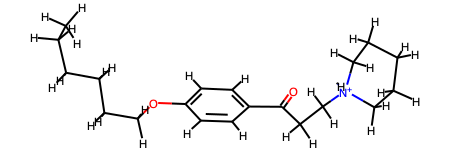

In [90]:
TKDGv2_m[0]

In [96]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawMol3D(df_nonna['ROMol'][0])

NameError: name 'py3Dmol' is not defined

In [99]:
import py3Dmol

v = py3Dmol.view(width=400, height=400)
# mols_show = [DG_m[30], ETDG_m[30], ETKDGv1_m[30], ETKDGv2_m[30]]
mb = Chem.MolToMolBlock(TKDGv2_m[0])
v.addModel(mb, 'sdf')
v.setBackgroundColor('0xeeeeee')
v.setStyle({'stick': {}})
v.zoomTo()
v.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# 3D記述子を作成

In [93]:
from rdkit.Chem import Descriptors3D
from inspect import getmembers, isfunction

def df_3d_descriptor(df):
    df_3d = pd.DataFrame()
    df_3d = pd.concat([df_3d, df["No."], df["SMILES"]], axis=1, ignore_index=True)
    for i, j in [o for o in getmembers(Descriptors3D) if isfunction(o[1])]:
        df_3d[i]  = df["TKDGv2"].map(j)
    return df_3d.reset_index()


In [95]:
df_3d_desc = df_3d_descriptor(df_tkdg)

In [111]:
df_3d_desc.to_csv('data/3d_desc.csv')

# （準備5）所望の化合物に対し、RDKitのECFP4 fingerprint（GetMorganFingerprintAsBitVect(mol, 2, 2048)による）を計算できるようにせよ。

In [107]:
from rdkit.Chem import AllChem, Draw

def df_ecfp4_fingp(df):
    ecfp4 = pd.DataFrame()
    ecfp4 = pd.concat([ecfp4, df["No."], df["SMILES"]], axis=1, ignore_index=True)
    ecfp4["ECFP4"] = df["ROMol"].map(lambda x: AllChem.GetMorganFingerprint(x, 2))
    return ecfp4

In [108]:
df_ecfp4 = df_ecfp4_fingp(df_nonna)

In [110]:
import pickle
with open('data/df_ecfp4', 'wb') as file:
  pickle.dump(df_ecfp4 , file)

In [109]:
!mkdir data

In [127]:
Descriptors3D.Asphericity(TKDGv2_m[0])

0.7582720195608622

In [123]:
df_3d_descriptor(df_nonna)

RuntimeError: Pre-condition Violation
	molecule has no conformers
	Violation occurred on line 204 in file Code/GraphMol/Descriptors/PMI.cpp
	Failed Expression: mol.getNumConformers() >= 1
	RDKIT: 2019.09.3
	BOOST: 1_72


In [113]:
# from for i, j in Descriptors._descList:
#     print(j)
# print(Descriptors3D.methods)
from inspect import getmembers, isfunction



In [116]:
functions_list

Asphericity
Eccentricity
InertialShapeFactor
NPR1
NPR2
PMI1
PMI2
PMI3
RadiusOfGyration
SpherocityIndex

[('Asphericity', <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>),
 ('Eccentricity', <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>),
 ('InertialShapeFactor',
  <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>),
 ('NPR1', <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>),
 ('NPR2', <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>),
 ('PMI1', <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>),
 ('PMI2', <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>),
 ('PMI3', <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>),
 ('RadiusOfGyration', <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>),
 ('SpherocityIndex', <function rdkit.Chem.Descriptors3D.<lambda>(*x, **y)>)]

In [101]:
df_3d_descriptor(df_nonna)


AttributeError: module 'rdkit.Chem.Descriptors3D' has no attribute 'descList'

In [72]:
df_2d.shape # (694, 200)
df_2d.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,No.,SMILES,ROmol
0,12.276753,0.261638,12.276753,0.261638,0.529981,318.481,286.225,318.242756,128,0,...,0,0,0,0,0,3,0,1.0,[N@H+]2(CCCCC2)CCC(=O)c1ccc(OCCCCCC)cc1,"<img data-content=""rdkit/molecule"" src=""data:i..."
1,12.249370,0.216991,12.249370,0.216991,0.534284,328.476,298.236,328.227106,130,0,...,0,0,0,0,0,3,0,2.0,C(=O)(c1cc2c(cc(OCCCCCC)cc2)cc1)CC[N@H+](C)C,"<img data-content=""rdkit/molecule"" src=""data:i..."
2,11.885490,0.182469,11.885490,0.182469,0.531211,266.361,242.169,266.175070,106,0,...,0,0,0,0,0,2,0,3.0,C(=O)(c1ccc(OCCOCC)cc1)CC[N@@H+](C)C,"<img data-content=""rdkit/molecule"" src=""data:i..."
3,12.090771,0.216478,12.090771,0.216478,0.530771,292.443,262.203,292.227106,118,0,...,0,0,0,0,0,3,0,4.0,C(=O)(c1cc(C)c(OCCCCCC)cc1)CC[N@H+](C)C,"<img data-content=""rdkit/molecule"" src=""data:i..."
4,12.108951,0.139533,12.108951,0.139533,0.401309,328.929,301.713,328.149640,118,0,...,0,0,0,0,0,3,0,5.0,C(=O)(c1c(Cl)cc(SCCCCCC)cc1)CC[N@@H+](C)C,"<img data-content=""rdkit/molecule"" src=""data:i..."


In [61]:
df_nonna.head()
print(df_nonna.shape)

(694, 208)


In [27]:
mol_seri

0      <rdkit.Chem.rdchem.Mol object at 0x115b0e3f0>
1      <rdkit.Chem.rdchem.Mol object at 0x115b0e620>
2      <rdkit.Chem.rdchem.Mol object at 0x115b0e530>
3      <rdkit.Chem.rdchem.Mol object at 0x115b0e800>
4      <rdkit.Chem.rdchem.Mol object at 0x115b0e8a0>
5      <rdkit.Chem.rdchem.Mol object at 0x115b0e8f0>
6      <rdkit.Chem.rdchem.Mol object at 0x115b0e940>
7      <rdkit.Chem.rdchem.Mol object at 0x115b0e990>
8      <rdkit.Chem.rdchem.Mol object at 0x115b0ea30>
9      <rdkit.Chem.rdchem.Mol object at 0x115b0ea80>
10     <rdkit.Chem.rdchem.Mol object at 0x115b0ead0>
11     <rdkit.Chem.rdchem.Mol object at 0x115b0eb20>
12     <rdkit.Chem.rdchem.Mol object at 0x115b0eb70>
13     <rdkit.Chem.rdchem.Mol object at 0x115b0ebc0>
14     <rdkit.Chem.rdchem.Mol object at 0x115b0ec10>
15     <rdkit.Chem.rdchem.Mol object at 0x115b0ec60>
16     <rdkit.Chem.rdchem.Mol object at 0x115b0ecb0>
17     <rdkit.Chem.rdchem.Mol object at 0x115b0ed00>
18     <rdkit.Chem.rdchem.Mol object at 0x115b

In [35]:
df_mols[df_mols['ROMol'].isnull()].head()

,Unnamed: 0,Unnamed: 0.1,No.,Compound ID,SMILES,Assay ID,LogP app,ROMol
132,132,132,133.0,CHEMBL3425512,[C@]2(CCCC[NH3+])NC(=O)[C@](NC(=O)[C@@](NC(=O)...,CHEMBL3430218,-7.05,None
136,136,136,137.0,CHEMBL3425620,[C@]2(C[C@@](C)C)NC(=O)[C@@](NC(=O)[C@@](NC(=O...,CHEMBL3430218,-5.48,None
137,137,137,138.0,CHEMBL3425621,[C@@]2(C[C@@](C)C)NC(=O)[C@](C[C@@](C)C)NC(=O)...,CHEMBL3430218,-6.72,None
138,138,138,139.0,CHEMBL3425622,[C@]2(C[C@@](C)C)NC(=O)[C@](NC(=O)[C@@](NC(=O)...,CHEMBL3430218,-6.55,None
139,139,139,140.0,CHEMBL3425623,[C@]2(C[C@@](C)C)NC(=O)[C@](NC(=O)[C@@](NC(=O)...,CHEMBL3430218,-5.60,None


In [37]:
df_mols.at[136, 'SMILES']

'[C@]2(C[C@@](C)C)NC(=O)[C@@](NC(=O)[C@@](NC(=O)[C@]1CCCN1C(=O)[C@](NC(=O)[C@@](C[C@@](C)C)NC2=O)C[C@@](C)C)Cc3cnc4c3cccc4)C[C@@](C)C'

In [38]:
text = '[C@]2(C[C@@](C)C)NC(=O)[C@@](NC(=O)[C@@](NC(=O)[C@]1CCCN1C(=O)[C@](NC(=O)[C@@](C[C@@](C)C)NC2=O)C[C@@](C)C)Cc3cnc4c3cccc4)C[C@@](C)C'

In [39]:
df_mols.at[136, 'SMILES'] == text

True

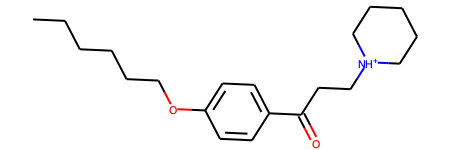

In [40]:
df_mols['ROMol'][0]

Unnamed: 0        0
Unnamed: 0.1      0
No.               0
Compound ID       0
SMILES            0
Assay ID          0
LogP app          0
ROMol           101
dtype: int64

In [17]:
df[df['No.'] == 131]['SMILES'] ==text

130    False
Name: SMILES, dtype: bool

In [15]:
text = "[C@]2(CCCC[NH3+])NC(=O)[C@](NC(=O)[C@@](NC(=O)[C@@]1CCCN1C(=O)[C@](NC(=O)[C@]([C@](O)C)NC2=O)Cc5ccccc5)Cc6ccccc6)Cc3cnc4c3cccc4"

In [18]:
print(df[df['No.'] == 131]['SMILES'] )
print(text)

130    N3[C@@](C[C@@](C)C)C(N[C@](C[C@@](C)C)C(N[C@@]...
Name: SMILES, dtype: object
N3[C@@](C[C@@](C)C)C(N[C@](C[C@@](C)C)C(N[C@@](C[C@@](C)C)C(N[C@@](C[C@@](C)C)C(N1[C@](CCC1)C(N[C@@](Cc2ccc(O)cc2)C3=O)=O)=O)=O)=O)=O


In [16]:
print(df.at[132, 'SMILES'])
print(text)

[C@]2(CCCC[NH3+])NC(=O)[C@](NC(=O)[C@@](NC(=O)[C@@]1CCCN1C(=O)[C@](NC(=O)[C@]([C@](O)C)NC2=O)Cc5ccccc5)Cc6ccccc6)Cc3cnc4c3cccc4
[C@]2(CCCC[NH3+])NC(=O)[C@](NC(=O)[C@@](NC(=O)[C@@]1CCCN1C(=O)[C@](NC(=O)[C@]([C@](O)C)NC2=O)Cc5ccccc5)Cc6ccccc6)Cc3cnc4c3cccc4


In [18]:
 m = Chem.MolFromSmiles(text)

RDKit ERROR: [08:38:03] Can't kekulize mol.  Unkekulized atoms: 50 51 52 53 54 55 56 57 58
RDKit ERROR: 


In [19]:
text

'[C@]2(CCCC[NH3+])NC(=O)[C@](NC(=O)[C@@](NC(=O)[C@@]1CCCN1C(=O)[C@](NC(=O)[C@]([C@](O)C)NC2=O)Cc5ccccc5)Cc6ccccc6)Cc3cnc4c3cccc4'